In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
df = pd.read_csv('jordan2.csv')

In [3]:
df.dtypes

Year                int64
Planted Area      float64
Harvested Area    float64
Temp_mean         float64
Temp_min          float64
Temp_max          float64
Precipitation     float64
Average Yield     float64
crop               object
Production        float64
dtype: object

In [43]:
df.crop.unique

<bound method Series.unique of 0      4
1      4
2      4
3      4
4      4
      ..
115    3
116    3
117    3
118    3
119    3
Name: crop, Length: 120, dtype: int8>

In [4]:
df.crop=df.crop.astype('category').cat.codes
df

,Year,Planted Area,Harvested Area,Temp_mean,Temp_min,Temp_max,Precipitation,Average Yield,crop,Production
0,1999,506626.9,40875.9,19.73,12.48,27.03,66.53,0.23,4,9250.5
1,2000,476437.7,182036.7,18.94,11.71,26.22,96.50,0.14,4,25433.7
2,2001,443559.5,134494.7,19.76,12.60,26.97,104.04,0.14,4,19293.0
3,2002,427042.7,327454.4,19.52,12.41,26.68,126.07,0.13,4,43770.8
4,2003,500622.8,297813.0,19.50,12.50,26.54,133.74,0.14,4,42526.0
...,...,...,...,...,...,...,...,...,...,...
115,2018,8231.4,5341.7,20.44,13.50,27.44,122.96,0.07,3,371.6
116,2019,935.0,532.6,19.89,12.88,26.96,112.83,0.07,3,38.4
117,2020,2927.8,1904.3,19.90,12.90,26.90,145.40,0.43,3,819.1
118,2021,4561.9,3017.3,20.30,13.10,27.60,89.20,0.34,3,1012.5


In [8]:
print(df['Year'].unique)

<bound method Series.unique of 0      1999
1      2000
2      2001
3      2002
4      2003
       ... 
115    2018
116    2019
117    2020
118    2021
119    2022
Name: Year, Length: 120, dtype: int64>


In [9]:
X = df.drop(['Production'], axis=1)
y = df['Production']

In [10]:
X

,Year,Planted Area,Harvested Area,Temp_mean,Temp_min,Temp_max,Precipitation,Average Yield,crop
0,1999,506626.9,40875.9,19.73,12.48,27.03,66.53,0.23,4
1,2000,476437.7,182036.7,18.94,11.71,26.22,96.50,0.14,4
2,2001,443559.5,134494.7,19.76,12.60,26.97,104.04,0.14,4
3,2002,427042.7,327454.4,19.52,12.41,26.68,126.07,0.13,4
4,2003,500622.8,297813.0,19.50,12.50,26.54,133.74,0.14,4
...,...,...,...,...,...,...,...,...,...
115,2018,8231.4,5341.7,20.44,13.50,27.44,122.96,0.07,3
116,2019,935.0,532.6,19.89,12.88,26.96,112.83,0.07,3
117,2020,2927.8,1904.3,19.90,12.90,26.90,145.40,0.43,3
118,2021,4561.9,3017.3,20.30,13.10,27.60,89.20,0.34,3


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Coefficients:", model.coef_)

Coefficients: [ 2.24711652e+01 -3.28774525e-03  1.14711906e-01 -7.71040012e+04
  4.37772247e+04  3.46707089e+04 -5.51887205e+00  5.14100333e+03
  1.30483296e+03]


In [16]:
print("Intercept:", model.intercept_)

Intercept: -10877.321672448796


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# After making predictions on the testing set (y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 66697815.977712475
R-squared: 0.866023170528435


## Wheat LR

In [19]:
wheat_data = df[df['crop'] == 4]
Xw = wheat_data.drop(['Production'], axis=1)
yw = wheat_data['Production']
#wheat_planted = wheat_data['Planted Area']
#wheat_production = wheat_data['Production']

In [20]:
X_trainw, X_testw, y_trainw, y_testw = train_test_split(Xw, yw, test_size=0.2, random_state=42)

In [21]:
model_w = LinearRegression()
model_w.fit(X_trainw, y_trainw)
y_predw = model.predict(X_testw)

In [22]:
print("Coefficients:", model_w.coef_)

Coefficients: [-5.45731177e+02 -1.64119526e-02  1.27802734e-01 -3.67467025e+04
  1.33131016e+04  2.70150702e+04  1.05309685e+02  1.46362837e+05
  0.00000000e+00]


In [23]:
print("Intercept:", model_w.intercept_)

Intercept: 901546.1224140737


In [24]:
msew = mean_squared_error(y_testw, y_predw)
r2w = r2_score(y_testw, y_predw)
# Print the performance metrics
print("Mean Squared Error (MSE):", msew)
print("R-squared:", r2w)

Mean Squared Error (MSE): 15317280.148065481
R-squared: 0.48954323889368934


## Barley LR

In [25]:
barley_data = df[df['crop'] == 3]
Xb = barley_data.drop(['Production'], axis=1)
yb = barley_data['Production']
#wheat_planted = wheat_data['Planted Area']
#wheat_production = wheat_data['Production']

In [26]:
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.2, random_state=42)
model_b = LinearRegression()
model_b.fit(X_trainb, y_trainb)
y_predb = model.predict(X_testb)

In [27]:
print("Coefficients:", model_b.coef_)

Coefficients: [-2.06910419e+01 -2.18398740e-02  1.38082414e-01 -1.26541780e+04
  6.64340256e+03  6.40425873e+03  2.51283308e+00  3.66151200e+03
  0.00000000e+00]


In [28]:
print("Intercept:", model_b.intercept_)

Intercept: 34437.31955930202


In [29]:
mseb = mean_squared_error(y_testb, y_predb)
r2b = r2_score(y_testb, y_predb)
# Print the performance metrics
print("Mean Squared Error (MSE):", mseb)
print("R-squared:", r2b)

Mean Squared Error (MSE): 2949199.405264253
R-squared: -0.14465463855204663


## Lentil LR

In [30]:
Lentil_data = df[df['crop'] == 2]
Xl = Lentil_data.drop(['Production'], axis=1)
yl = Lentil_data['Production']
#wheat_planted = wheat_data['Planted Area']
#wheat_production = wheat_data['Production']

In [31]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xl, yl, test_size=0.2, random_state=42)
model_l = LinearRegression()
model_l.fit(X_trainl, y_trainl)
y_predl = model.predict(X_testl)

In [32]:
print("Coefficients:", model_l.coef_)

Coefficients: [-5.65629049e+01  1.76046105e-01 -1.41102788e-01 -1.57917972e+04
  6.92962131e+03  8.89734598e+03  1.23738588e+01  2.52120006e+03
  0.00000000e+00]


In [33]:
print("Intercept:", model_l.intercept_)

Intercept: 97059.24151762539


In [34]:
msel = mean_squared_error(y_testl, y_predl)
r2l = r2_score(y_testl, y_predl)
# Print the performance metrics
print("Mean Squared Error (MSE):", msel)
print("R-squared:", r2l)

Mean Squared Error (MSE): 1331457.4642626964
R-squared: -85.58030790870389


## Chickpea LR

In [35]:
Chickpea_data = df[df['crop'] == 1]
Xc = Chickpea_data.drop(['Production'], axis=1)
yc = Chickpea_data['Production']
#wheat_planted = wheat_data['Planted Area']
#wheat_production = wheat_data['Production']

In [36]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size=0.2, random_state=42)
model_c = LinearRegression()
model_c.fit(X_trainc, y_trainc)
y_predc = model.predict(X_testc)

In [37]:
print("Coefficients:", model_l.coef_)

Coefficients: [-5.65629049e+01  1.76046105e-01 -1.41102788e-01 -1.57917972e+04
  6.92962131e+03  8.89734598e+03  1.23738588e+01  2.52120006e+03
  0.00000000e+00]


In [38]:
print("Intercept:", model_l.intercept_)

Intercept: 97059.24151762539


In [39]:
msel = mean_squared_error(y_testl, y_predl)
r2l = r2_score(y_testl, y_predl)
# Print the performance metrics
print("Mean Squared Error (MSE):", msel)
print("R-squared:", r2l)

Mean Squared Error (MSE): 1331457.4642626964
R-squared: -85.58030790870389


In [40]:
yc.count()

24

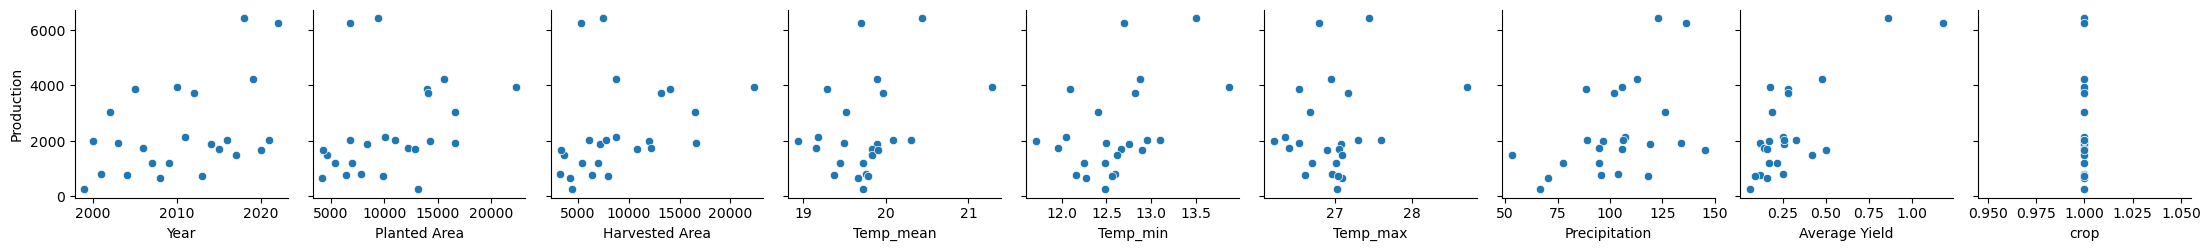

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Chickpea_data, x_vars=Chickpea_data.columns[:-1], y_vars='Production')  # Exclude the target column from x_vars
plt.show()